# Import libraries necessary for this dissertation

In [1]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt1  # Standard datetime as dt1
from datetime import datetime as dt  # datetime.datetime as dt
import warnings
from matplotlib import pyplot
#from pandas import read_csv, set_option
from pandas import Series  # Only import Series, not datetime
from pandas.plotting import scatter_matrix, autocorrelation_plot  # Fixed path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from xgboost import XGBClassifier
import seaborn as sns


# Loading Data

In [2]:
df=pd.read_csv("Data/Processed Data/new_final_data_daily.csv")

In [3]:
df.columns

Index(['gold_price', 'Time', 'price', 'Estimated_transaction_volume',
       'market capitalisation', 'block_size', 'number_of_transaction',
       'Mempool_count', 'Mempool_size', 'Confirmed_Transaction',
       'google_trend', 'mining_difficulty', 'hash_rate_via_BTC',
       'Transaction_fee'],
      dtype='object')

# Data Cleaning

In [4]:
df['Time'] = pd.to_datetime(df['Time'])

In [5]:
df.head()

,gold_price,Time,price,Estimated_transaction_volume,market capitalisation,block_size,number_of_transaction,Mempool_count,Mempool_size,Confirmed_Transaction,google_trend,mining_difficulty,hash_rate_via_BTC,Transaction_fee
0,143.95,2020-01-02,6967.0,632780.0,1.304230e+11,0.794684,287215.0,1716.744792,6.258790e+05,287215.0,26,1.379878e+13,1.057932e+08,0.313629
1,145.86,2020-01-03,7343.1,936290.0,1.262808e+11,0.794684,287215.0,1716.744792,6.258790e+05,287215.0,29,1.379878e+13,1.057932e+08,0.313629
2,147.39,2020-01-06,7759.1,786750.0,1.333890e+11,0.794684,287215.0,4644.067708,2.169053e+06,287215.0,30,1.379878e+13,1.057932e+08,0.313629
3,147.97,2020-01-07,8155.7,1010000.0,1.405572e+11,0.794684,287215.0,4644.067708,2.169053e+06,287215.0,36,1.379878e+13,1.057932e+08,0.313629
4,146.86,2020-01-08,8059.6,1190000.0,1.477986e+11,1.063491,318019.0,8607.500000,4.346005e+06,318019.0,38,1.379878e+13,1.057932e+08,0.797560


In [6]:
df['gold_price']=df['gold_price'].fillna(method='ffill')

/var/folders/9d/njcmv3bs67bgg_6p6s5pyjsw0000gn/T/ipykernel_11468/3134562986.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['gold_price']=df['gold_price'].fillna(method='ffill')


In [7]:
df.head()

,gold_price,Time,price,Estimated_transaction_volume,market capitalisation,block_size,number_of_transaction,Mempool_count,Mempool_size,Confirmed_Transaction,google_trend,mining_difficulty,hash_rate_via_BTC,Transaction_fee
0,143.95,2020-01-02,6967.0,632780.0,1.304230e+11,0.794684,287215.0,1716.744792,6.258790e+05,287215.0,26,1.379878e+13,1.057932e+08,0.313629
1,145.86,2020-01-03,7343.1,936290.0,1.262808e+11,0.794684,287215.0,1716.744792,6.258790e+05,287215.0,29,1.379878e+13,1.057932e+08,0.313629
2,147.39,2020-01-06,7759.1,786750.0,1.333890e+11,0.794684,287215.0,4644.067708,2.169053e+06,287215.0,30,1.379878e+13,1.057932e+08,0.313629
3,147.97,2020-01-07,8155.7,1010000.0,1.405572e+11,0.794684,287215.0,4644.067708,2.169053e+06,287215.0,36,1.379878e+13,1.057932e+08,0.313629
4,146.86,2020-01-08,8059.6,1190000.0,1.477986e+11,1.063491,318019.0,8607.500000,4.346005e+06,318019.0,38,1.379878e+13,1.057932e+08,0.797560


In [8]:
df.tail()

,gold_price,Time,price,Estimated_transaction_volume,market capitalisation,block_size,number_of_transaction,Mempool_count,Mempool_size,Confirmed_Transaction,google_trend,mining_difficulty,hash_rate_via_BTC,Transaction_fee
1359,303.65,2025-04-23,93697.7,90350.0,1.858588e+12,1.572216,418203.0,21466.583333,1.274924e+07,418203.0,53,1.232344e+14,8.993776e+08,2.523899
1360,308.07,2025-04-24,93980.3,66680.0,1.858660e+12,1.572216,418203.0,21466.583333,1.274924e+07,418203.0,43,1.232344e+14,8.237550e+08,2.523899
1361,304.73,2025-04-25,94676.9,92040.0,1.864298e+12,1.572216,418203.0,15415.234375,1.714119e+07,418203.0,42,1.232344e+14,8.237550e+08,2.523899
1362,309.07,2025-04-28,94995.0,73630.0,1.862772e+12,1.603343,441827.0,8253.588542,7.712119e+06,441827.0,41,1.232344e+14,8.296374e+08,1.104718
1363,306.06,2025-04-29,94269.8,59860.0,1.887067e+12,1.603343,441827.0,8253.588542,7.712119e+06,441827.0,40,1.232344e+14,8.296374e+08,1.104718


# Removing NAN value from data

In [9]:
df = df.dropna()

# Dependent Variable

In [10]:
y = np.where(df['price'].shift(-1) > df['price'],1,-1)

# Features included in the models

In [11]:
X=df.drop(['Time'], axis=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X= scaler.fit_transform(X)

# Splitting the data as train and test

In [13]:
t=.8
t = int(t*len(df))
# Train dataset
X_train = X[:t]
y_train = y[:t]
# Test dataset
X_test = X[t:]
y_test = y[t:]

# Models

In [16]:
# Import CatBoost at the top with your other imports
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Define models to include in the comparison
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
# Add CatBoost classifier
models.append(('CAT', CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0)))


# Results

In [17]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
results = []
names = []


for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accu_score = accuracy_score(y_test, y_pred)
    F1_score=f1_score(y_test, y_pred)
    Recall=recall_score(y_test, y_pred)
    Precision=precision_score(y_test, y_pred)
    results= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)
    print( "Model :" + name)
    print ('Accuracy Score :',accuracy_score(y_test,y_pred))
    print('f1'+": " + str(F1_score))
    print('Recall' + ": " + str(Recall))
    print('precision' + ": " + str(Precision))
    print ('Confusion Matrix :')
    print (results)
    plt.show() 
    print(classification_report(y_test,y_pred))

Model :LR
Accuracy Score : 0.4945054945054945
f1: 0.09210526315789473
Recall: 0.051094890510948905
precision: 0.4666666666666667
Confusion Matrix :
Predicted    0  1
Actual           
0          128  8
1          130  7
              precision    recall  f1-score   support

           0       0.50      0.94      0.65       136
           1       0.47      0.05      0.09       137

    accuracy                           0.49       273
   macro avg       0.48      0.50      0.37       273
weighted avg       0.48      0.49      0.37       273

Model :LDA
Accuracy Score : 0.5128205128205128
f1: 0.3813953488372093
Recall: 0.29927007299270075
precision: 0.5256410256410257
Confusion Matrix :
Predicted   0   1
Actual           
0          99  37
1          96  41
              precision    recall  f1-score   support

           0       0.51      0.73      0.60       136
           1       0.53      0.30      0.38       137

    accuracy                           0.51       273
   macro avg    

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

Model :RF
Accuracy Score : 0.5128205128205128
f1: 0.19393939393939394
Recall: 0.11678832116788321
precision: 0.5714285714285714
Confusion Matrix :
Predicted    0   1
Actual            
0          124  12
1          121  16
              precision    recall  f1-score   support

           0       0.51      0.91      0.65       136
           1       0.57      0.12      0.19       137

    accuracy                           0.51       273
   macro avg       0.54      0.51      0.42       273
weighted avg       0.54      0.51      0.42       273

Model :XGB
Accuracy Score : 0.5201465201465202
f1: 0.38497652582159625
Recall: 0.29927007299270075
precision: 0.5394736842105263
Confusion Matrix :
Predicted    0   1
Actual            
0          101  35
1           96  41
              precision    recall  f1-score   support

           0       0.51      0.74      0.61       136
           1       0.54      0.30      0.38       137

    accuracy                           0.52       273
   macro

Model: LR
Accuracy Score: 0.4945054945054945
f1: 0.09210526315789473
Recall: 0.051094890510948905
precision: 0.4666666666666667


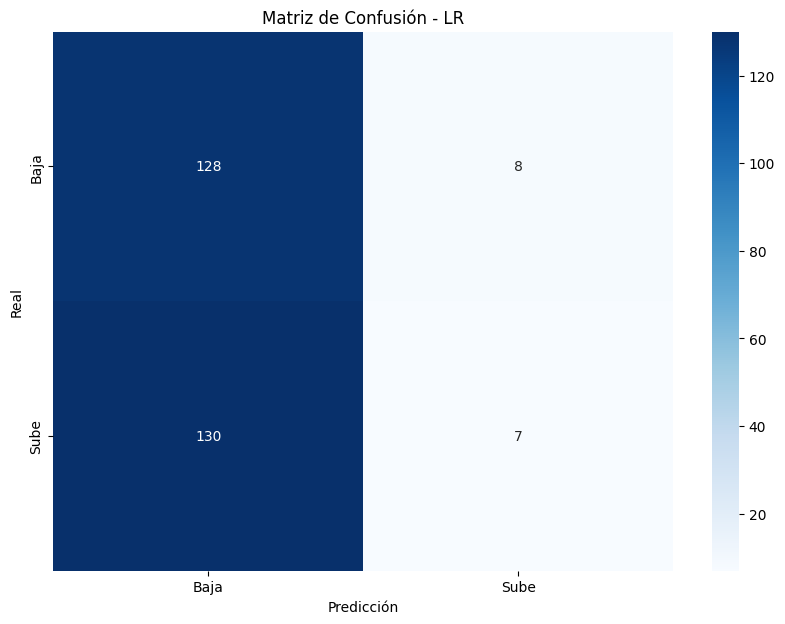

              precision    recall  f1-score   support

           0       0.50      0.94      0.65       136
           1       0.47      0.05      0.09       137

    accuracy                           0.49       273
   macro avg       0.48      0.50      0.37       273
weighted avg       0.48      0.49      0.37       273


--------------------------------------------------

Model: LDA
Accuracy Score: 0.5128205128205128
f1: 0.3813953488372093
Recall: 0.29927007299270075
precision: 0.5256410256410257


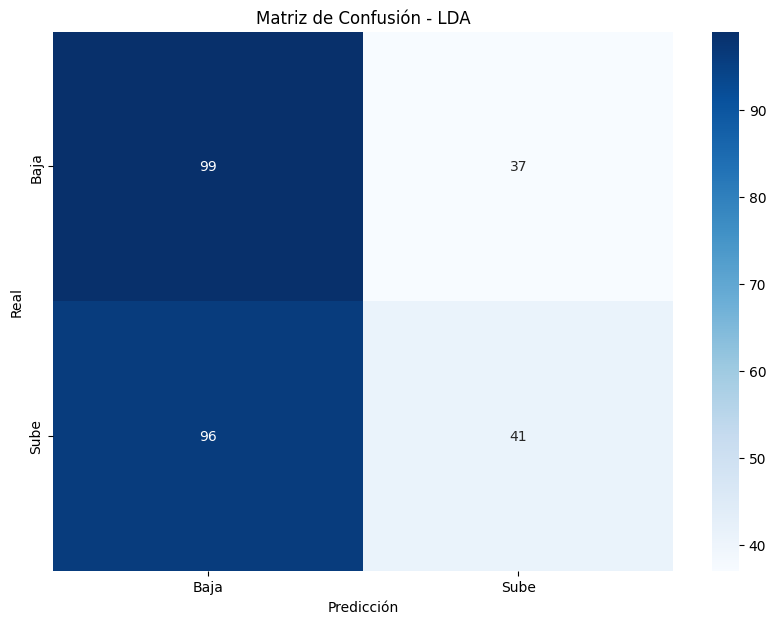

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       136
           1       0.53      0.30      0.38       137

    accuracy                           0.51       273
   macro avg       0.52      0.51      0.49       273
weighted avg       0.52      0.51      0.49       273


--------------------------------------------------

Model: KNN
Accuracy Score: 0.48717948717948717
f1: 0.38596491228070173
Recall: 0.32116788321167883
precision: 0.4835164835164835


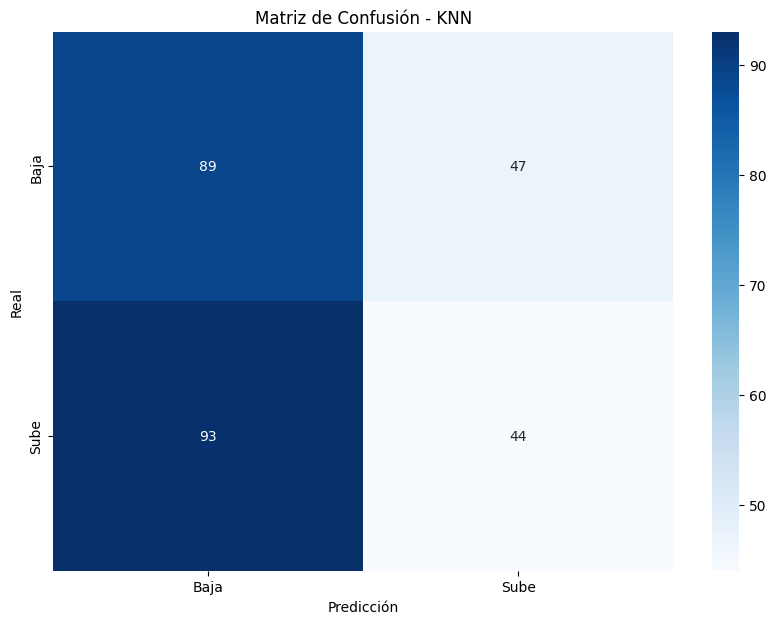

              precision    recall  f1-score   support

           0       0.49      0.65      0.56       136
           1       0.48      0.32      0.39       137

    accuracy                           0.49       273
   macro avg       0.49      0.49      0.47       273
weighted avg       0.49      0.49      0.47       273


--------------------------------------------------

Model: CART
Accuracy Score: 0.4981684981684982
f1: 0.0
Recall: 0.0
precision: 0.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


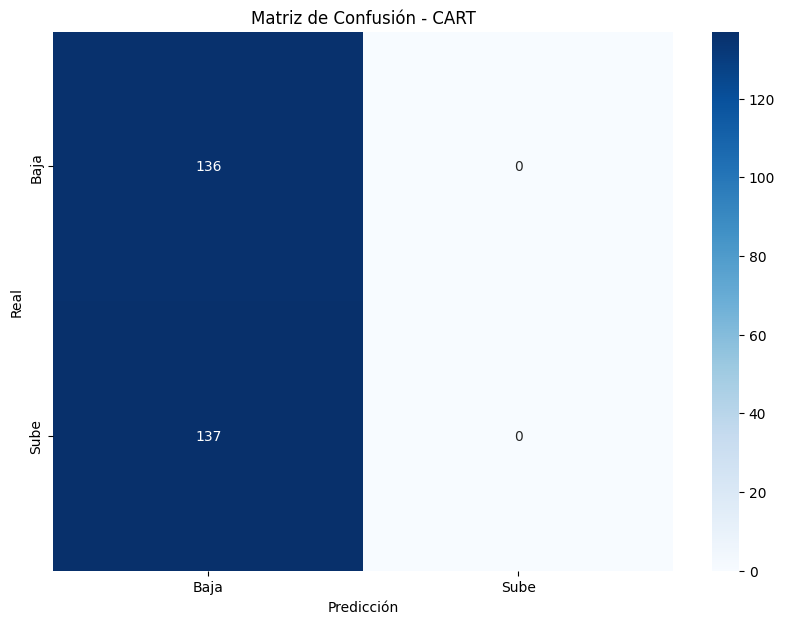

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       136
           1       0.00      0.00      0.00       137

    accuracy                           0.50       273
   macro avg       0.25      0.50      0.33       273
weighted avg       0.25      0.50      0.33       273


--------------------------------------------------

Model: NB
Accuracy Score: 0.5091575091575091
f1: 0.6699507389162561
Recall: 0.9927007299270073
precision: 0.5055762081784386


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

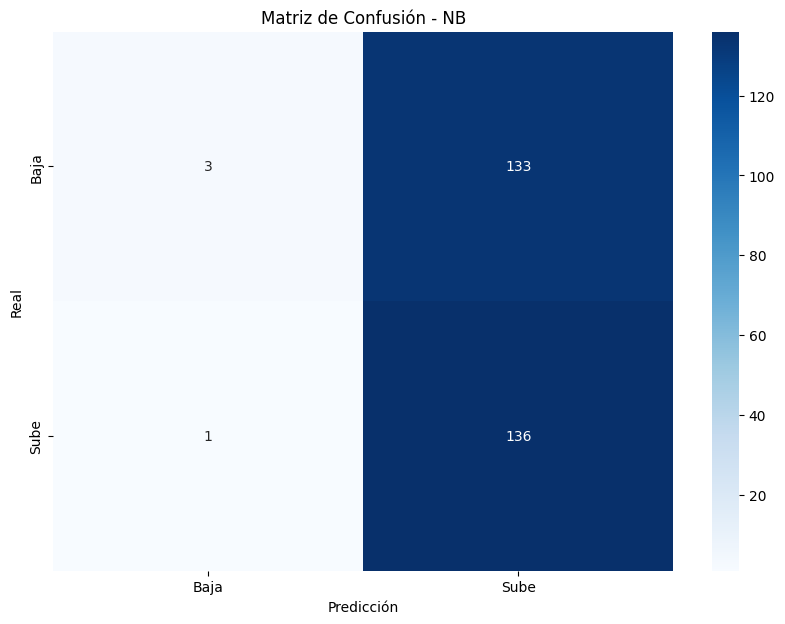

              precision    recall  f1-score   support

           0       0.75      0.02      0.04       136
           1       0.51      0.99      0.67       137

    accuracy                           0.51       273
   macro avg       0.63      0.51      0.36       273
weighted avg       0.63      0.51      0.36       273


--------------------------------------------------

Model: QDA
Accuracy Score: 0.5018315018315018
f1: 0.31313131313131315
Recall: 0.22627737226277372
precision: 0.5081967213114754


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


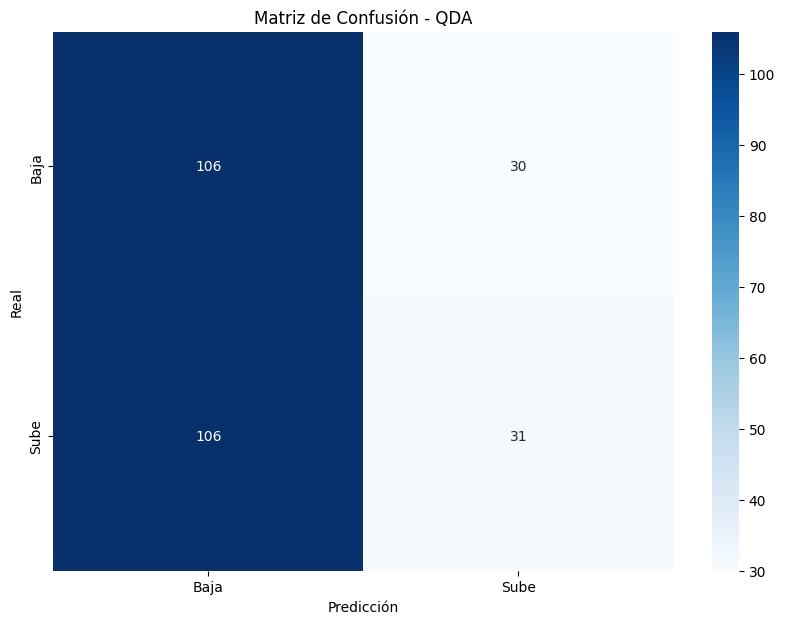

              precision    recall  f1-score   support

           0       0.50      0.78      0.61       136
           1       0.51      0.23      0.31       137

    accuracy                           0.50       273
   macro avg       0.50      0.50      0.46       273
weighted avg       0.50      0.50      0.46       273


--------------------------------------------------

Model: SVM
Accuracy Score: 0.5018315018315018
f1: 0.48484848484848486
Recall: 0.46715328467153283
precision: 0.5039370078740157


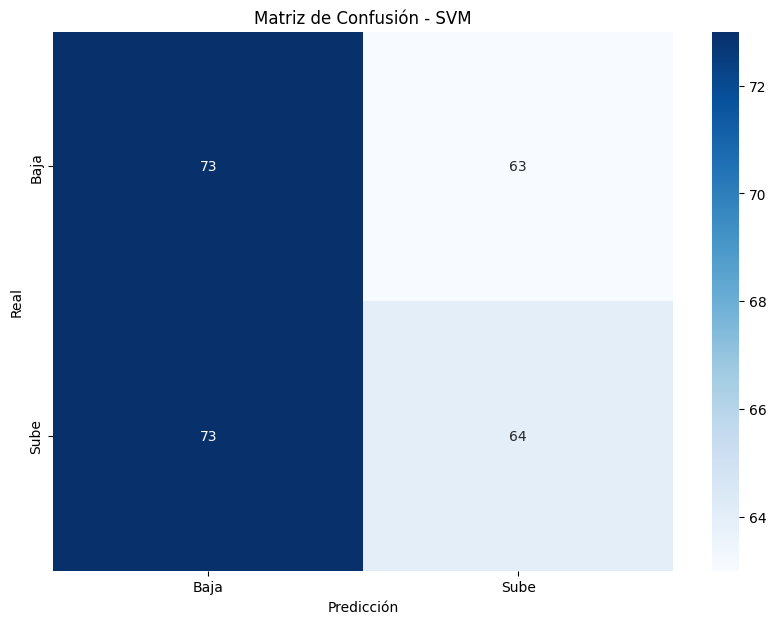

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       136
           1       0.50      0.47      0.48       137

    accuracy                           0.50       273
   macro avg       0.50      0.50      0.50       273
weighted avg       0.50      0.50      0.50       273


--------------------------------------------------

Model: RF
Accuracy Score: 0.5091575091575091
f1: 0.1625
Recall: 0.0948905109489051
precision: 0.5652173913043478


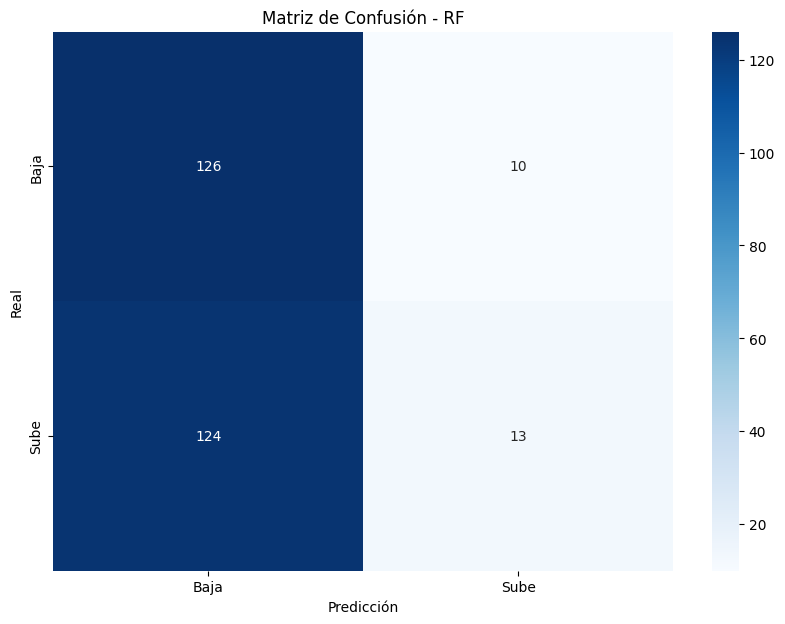

              precision    recall  f1-score   support

           0       0.50      0.93      0.65       136
           1       0.57      0.09      0.16       137

    accuracy                           0.51       273
   macro avg       0.53      0.51      0.41       273
weighted avg       0.53      0.51      0.41       273


--------------------------------------------------

Model: XGB
Accuracy Score: 0.5201465201465202
f1: 0.38497652582159625
Recall: 0.29927007299270075
precision: 0.5394736842105263


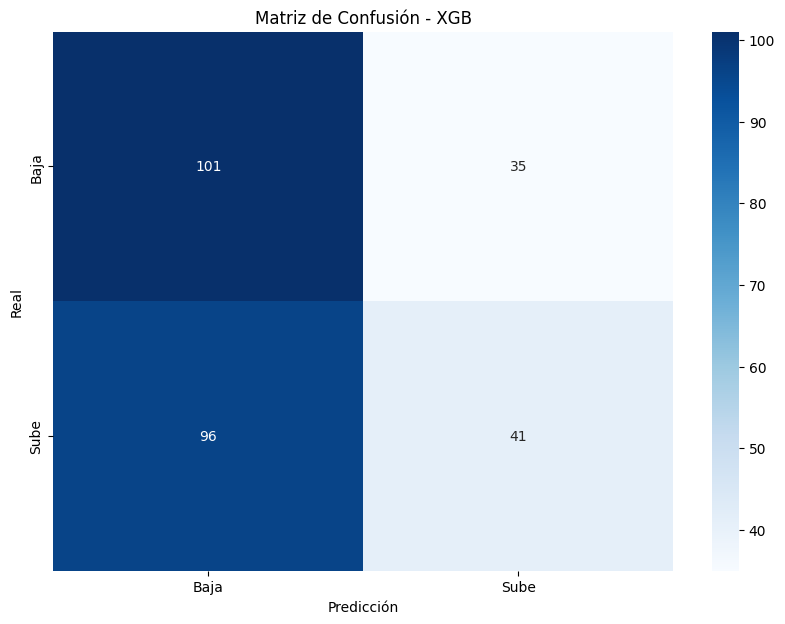

              precision    recall  f1-score   support

           0       0.51      0.74      0.61       136
           1       0.54      0.30      0.38       137

    accuracy                           0.52       273
   macro avg       0.53      0.52      0.50       273
weighted avg       0.53      0.52      0.50       273


--------------------------------------------------

Model: ADA
Accuracy Score: 0.5238095238095238
f1: 0.13333333333333333
Recall: 0.072992700729927
precision: 0.7692307692307693


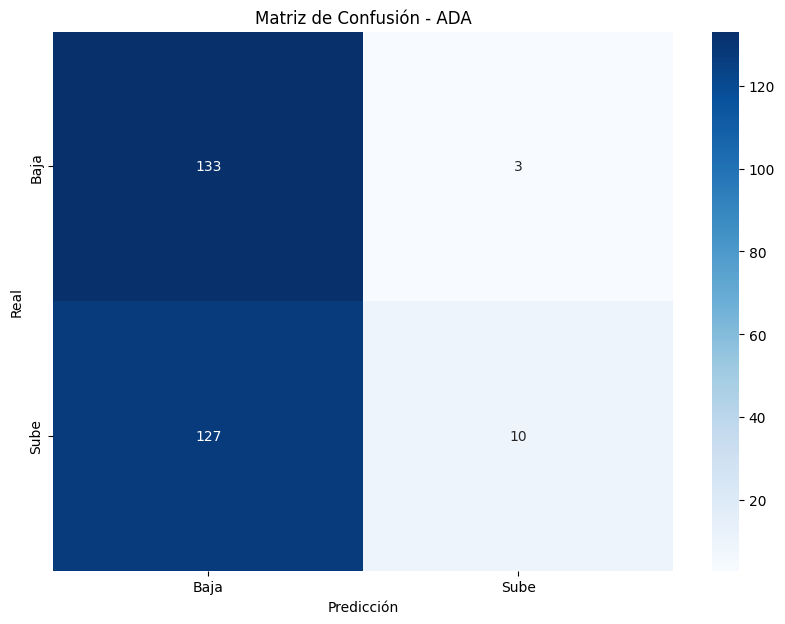

              precision    recall  f1-score   support

           0       0.51      0.98      0.67       136
           1       0.77      0.07      0.13       137

    accuracy                           0.52       273
   macro avg       0.64      0.53      0.40       273
weighted avg       0.64      0.52      0.40       273


--------------------------------------------------

Model: GB
Accuracy Score: 0.5164835164835165
f1: 0.10810810810810811
Recall: 0.058394160583941604
precision: 0.7272727272727273


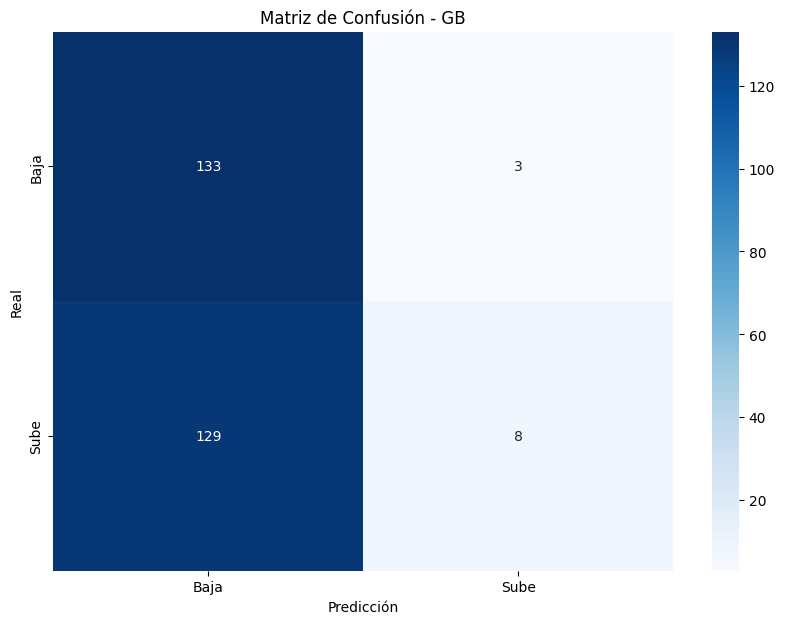

              precision    recall  f1-score   support

           0       0.51      0.98      0.67       136
           1       0.73      0.06      0.11       137

    accuracy                           0.52       273
   macro avg       0.62      0.52      0.39       273
weighted avg       0.62      0.52      0.39       273


--------------------------------------------------

Model: ET
Accuracy Score: 0.5201465201465202
f1: 0.2598870056497175
Recall: 0.1678832116788321
precision: 0.575


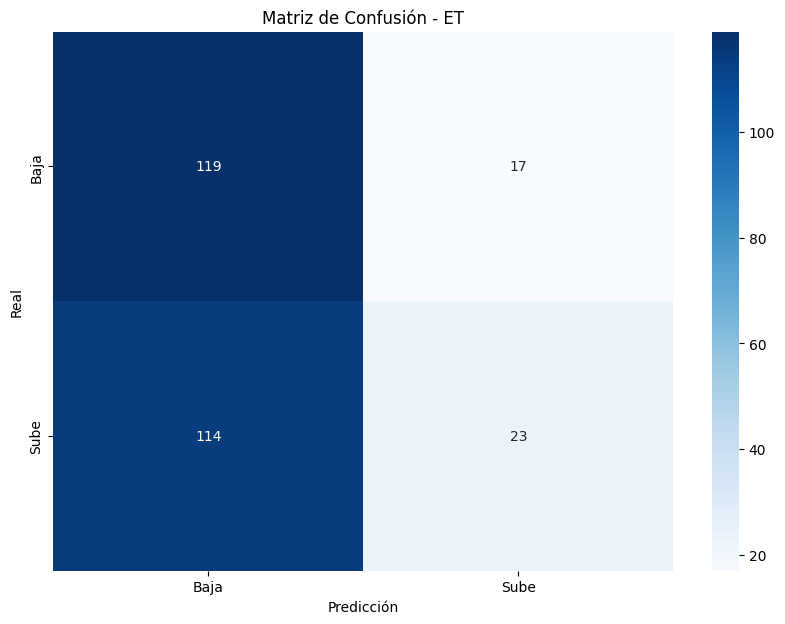

              precision    recall  f1-score   support

           0       0.51      0.88      0.64       136
           1       0.57      0.17      0.26       137

    accuracy                           0.52       273
   macro avg       0.54      0.52      0.45       273
weighted avg       0.54      0.52      0.45       273


--------------------------------------------------

Model: CAT
Accuracy Score: 0.5018315018315018
f1: 0.17073170731707318
Recall: 0.10218978102189781
precision: 0.5185185185185185


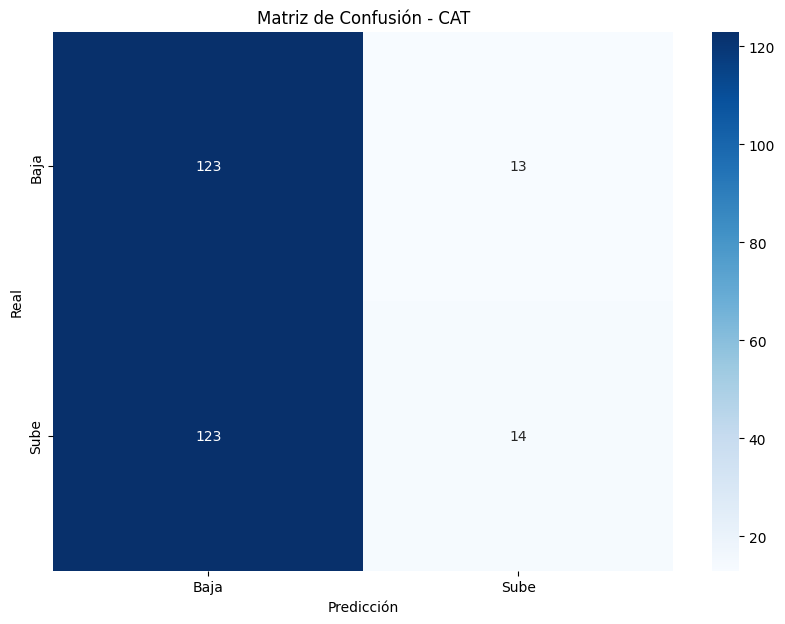

              precision    recall  f1-score   support

           0       0.50      0.90      0.64       136
           1       0.52      0.10      0.17       137

    accuracy                           0.50       273
   macro avg       0.51      0.50      0.41       273
weighted avg       0.51      0.50      0.41       273


--------------------------------------------------



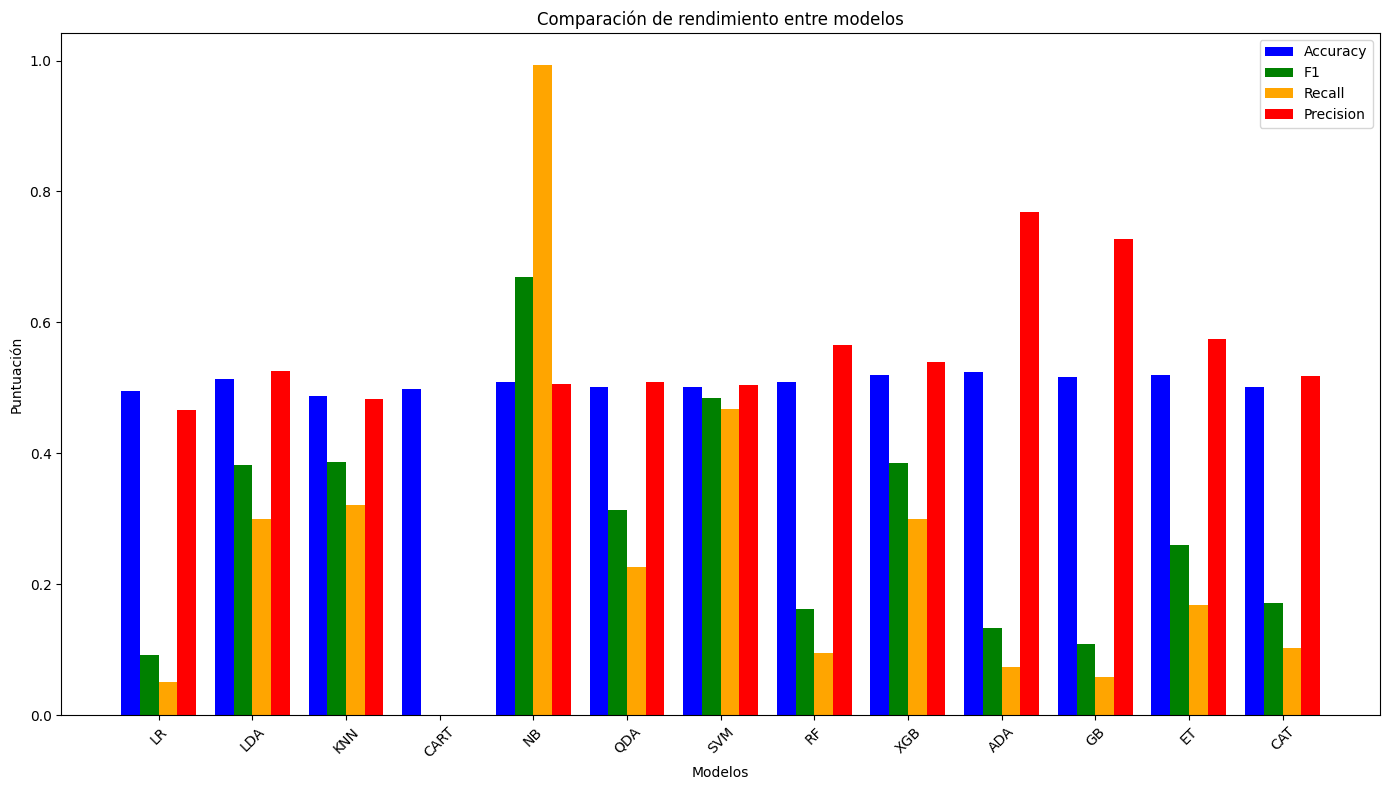

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# Para almacenar los resultados de todos los modelos
performance_metrics = {
    'Model': [],
    'Accuracy': [],
    'F1': [],
    'Recall': [],
    'Precision': []
}

for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calcular métricas
    accu_score = accuracy_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    Recall = recall_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred)
    
    # Guardar métricas para la comparación final
    performance_metrics['Model'].append(name)
    performance_metrics['Accuracy'].append(accu_score)
    performance_metrics['F1'].append(F1_score)
    performance_metrics['Recall'].append(Recall)
    performance_metrics['Precision'].append(Precision)
    
    # Mostrar resultados para este modelo
    print("Model: " + name)
    print('Accuracy Score:', accu_score)
    print('f1:', F1_score)
    print('Recall:', Recall)
    print('precision:', Precision)
    
    # Visualizar matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
               xticklabels=['Baja', 'Sube'],
               yticklabels=['Baja', 'Sube'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {name}')
    plt.show()
    
    # Mostrar reporte de clasificación
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

# Crear gráfica comparativa de todos los modelos
metrics_df = pd.DataFrame(performance_metrics)

plt.figure(figsize=(14, 8))
bar_width = 0.2
x = np.arange(len(metrics_df['Model']))

plt.bar(x - bar_width*1.5, metrics_df['Accuracy'], width=bar_width, label='Accuracy', color='blue')
plt.bar(x - bar_width/2, metrics_df['F1'], width=bar_width, label='F1', color='green')
plt.bar(x + bar_width/2, metrics_df['Recall'], width=bar_width, label='Recall', color='orange')
plt.bar(x + bar_width*1.5, metrics_df['Precision'], width=bar_width, label='Precision', color='red')

plt.xlabel('Modelos')
plt.ylabel('Puntuación')
plt.title('Comparación de rendimiento entre modelos')
plt.xticks(x, metrics_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


MODELO: LR
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 94.12%
- Precisión para clase 0 (confianza en las alertas de bajada): 49.61%
- F1-Score para clase 0 (balance): 64.97%
- Accuracy general: 49.45%


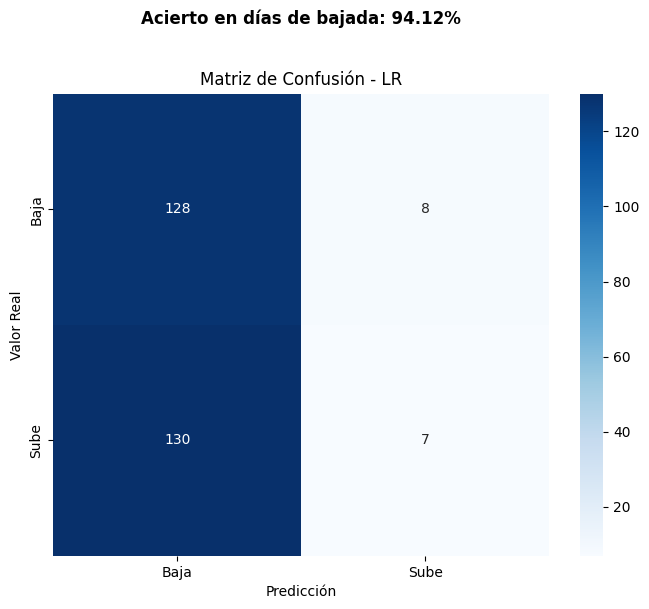

              precision    recall  f1-score   support

           0       0.50      0.94      0.65       136
           1       0.47      0.05      0.09       137

    accuracy                           0.49       273
   macro avg       0.48      0.50      0.37       273
weighted avg       0.48      0.49      0.37       273


MODELO: LDA
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 72.79%
- Precisión para clase 0 (confianza en las alertas de bajada): 50.77%
- F1-Score para clase 0 (balance): 59.82%
- Accuracy general: 51.28%


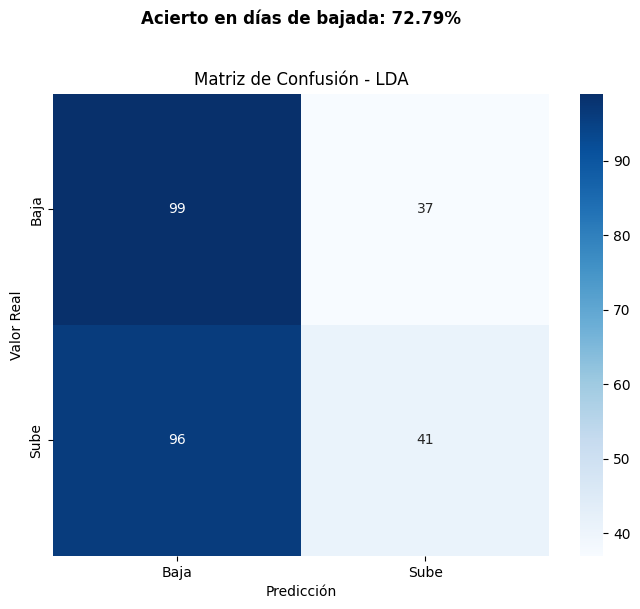

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       136
           1       0.53      0.30      0.38       137

    accuracy                           0.51       273
   macro avg       0.52      0.51      0.49       273
weighted avg       0.52      0.51      0.49       273


MODELO: KNN
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 65.44%
- Precisión para clase 0 (confianza en las alertas de bajada): 48.90%
- F1-Score para clase 0 (balance): 55.97%
- Accuracy general: 48.72%


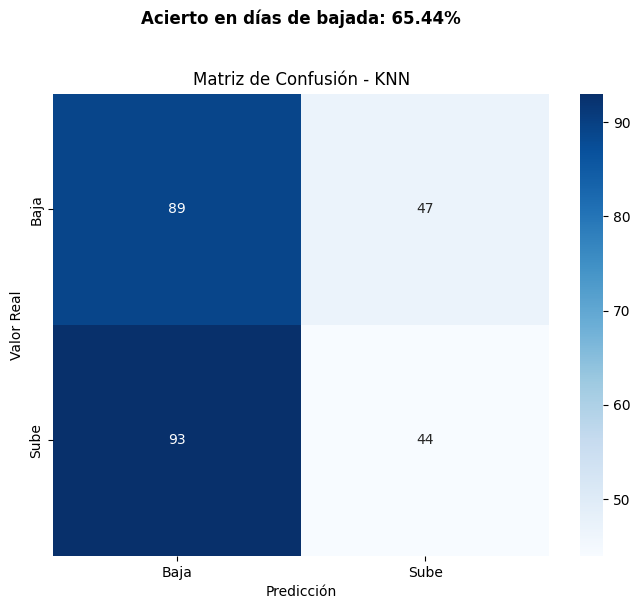

              precision    recall  f1-score   support

           0       0.49      0.65      0.56       136
           1       0.48      0.32      0.39       137

    accuracy                           0.49       273
   macro avg       0.49      0.49      0.47       273
weighted avg       0.49      0.49      0.47       273


MODELO: CART
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 100.00%
- Precisión para clase 0 (confianza en las alertas de bajada): 49.82%
- F1-Score para clase 0 (balance): 66.50%
- Accuracy general: 49.82%


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

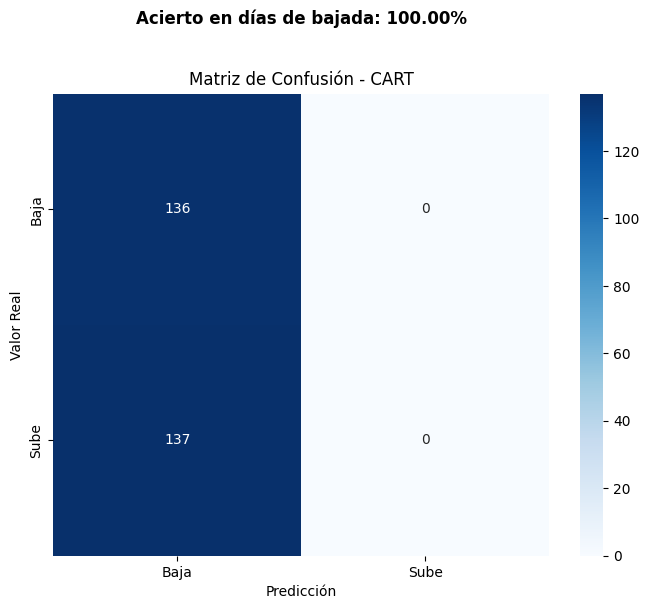

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       136
           1       0.00      0.00      0.00       137

    accuracy                           0.50       273
   macro avg       0.25      0.50      0.33       273
weighted avg       0.25      0.50      0.33       273


MODELO: NB
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 2.21%
- Precisión para clase 0 (confianza en las alertas de bajada): 75.00%
- F1-Score para clase 0 (balance): 4.29%
- Accuracy general: 50.92%


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

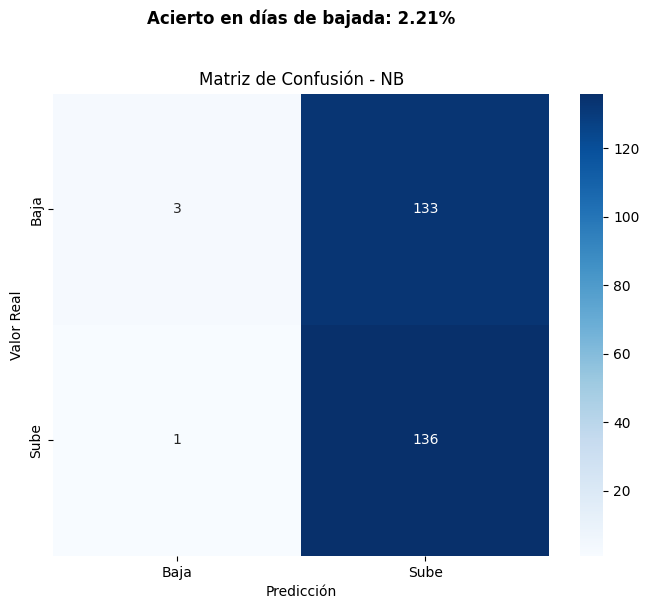

              precision    recall  f1-score   support

           0       0.75      0.02      0.04       136
           1       0.51      0.99      0.67       137

    accuracy                           0.51       273
   macro avg       0.63      0.51      0.36       273
weighted avg       0.63      0.51      0.36       273


MODELO: QDA
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 77.94%
- Precisión para clase 0 (confianza en las alertas de bajada): 50.00%
- F1-Score para clase 0 (balance): 60.92%
- Accuracy general: 50.18%


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


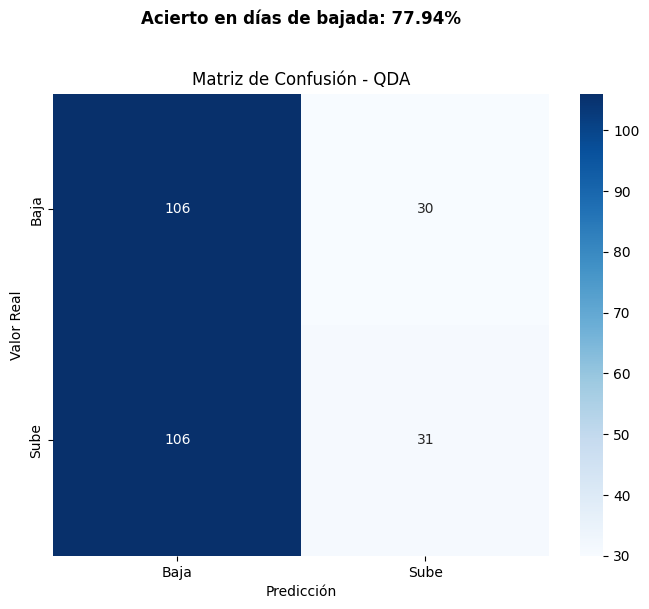

              precision    recall  f1-score   support

           0       0.50      0.78      0.61       136
           1       0.51      0.23      0.31       137

    accuracy                           0.50       273
   macro avg       0.50      0.50      0.46       273
weighted avg       0.50      0.50      0.46       273


MODELO: SVM
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 53.68%
- Precisión para clase 0 (confianza en las alertas de bajada): 50.00%
- F1-Score para clase 0 (balance): 51.77%
- Accuracy general: 50.18%


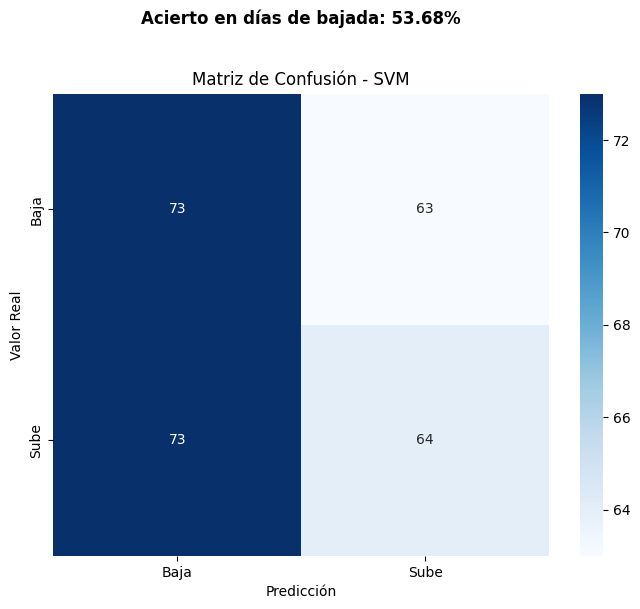

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       136
           1       0.50      0.47      0.48       137

    accuracy                           0.50       273
   macro avg       0.50      0.50      0.50       273
weighted avg       0.50      0.50      0.50       273


MODELO: RF
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 94.12%
- Precisión para clase 0 (confianza en las alertas de bajada): 49.81%
- F1-Score para clase 0 (balance): 65.14%
- Accuracy general: 49.82%


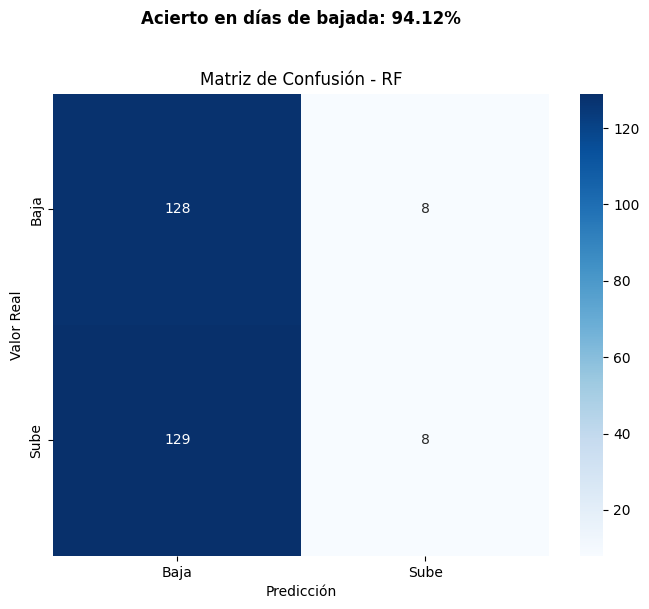

              precision    recall  f1-score   support

           0       0.50      0.94      0.65       136
           1       0.50      0.06      0.10       137

    accuracy                           0.50       273
   macro avg       0.50      0.50      0.38       273
weighted avg       0.50      0.50      0.38       273


MODELO: XGB
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 74.26%
- Precisión para clase 0 (confianza en las alertas de bajada): 51.27%
- F1-Score para clase 0 (balance): 60.66%
- Accuracy general: 52.01%


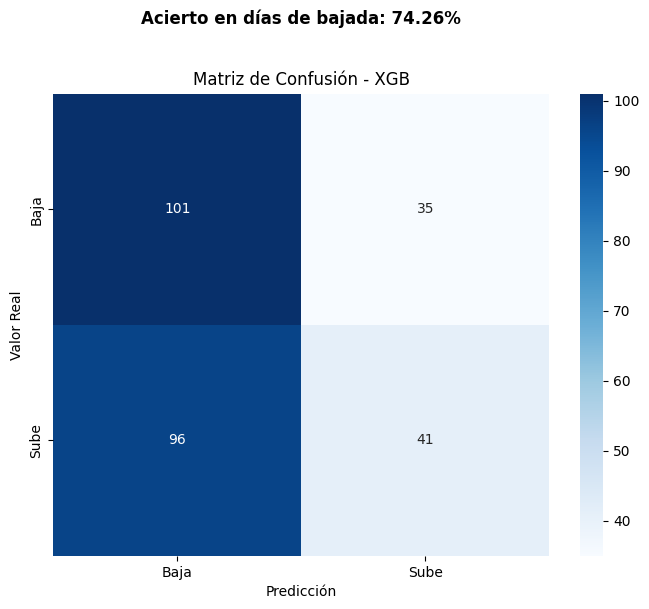

              precision    recall  f1-score   support

           0       0.51      0.74      0.61       136
           1       0.54      0.30      0.38       137

    accuracy                           0.52       273
   macro avg       0.53      0.52      0.50       273
weighted avg       0.53      0.52      0.50       273


MODELO: ADA
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 97.79%
- Precisión para clase 0 (confianza en las alertas de bajada): 51.15%
- F1-Score para clase 0 (balance): 67.17%
- Accuracy general: 52.38%


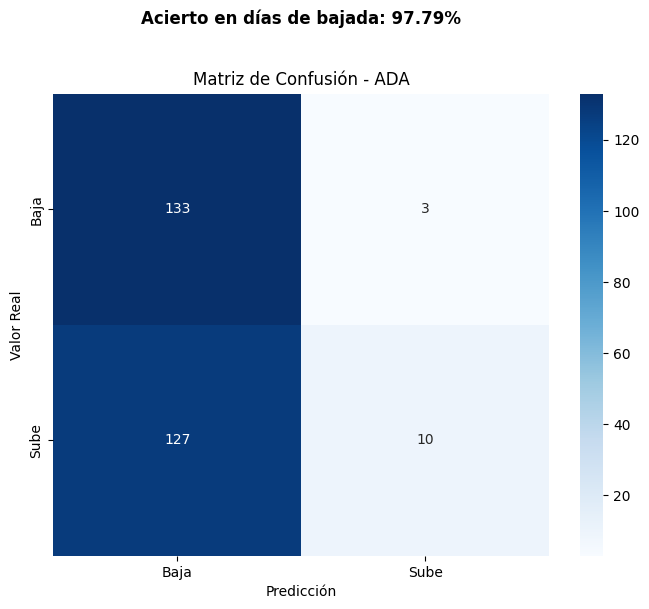

              precision    recall  f1-score   support

           0       0.51      0.98      0.67       136
           1       0.77      0.07      0.13       137

    accuracy                           0.52       273
   macro avg       0.64      0.53      0.40       273
weighted avg       0.64      0.52      0.40       273


MODELO: GB
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 99.26%
- Precisión para clase 0 (confianza en las alertas de bajada): 50.56%
- F1-Score para clase 0 (balance): 67.00%
- Accuracy general: 51.28%


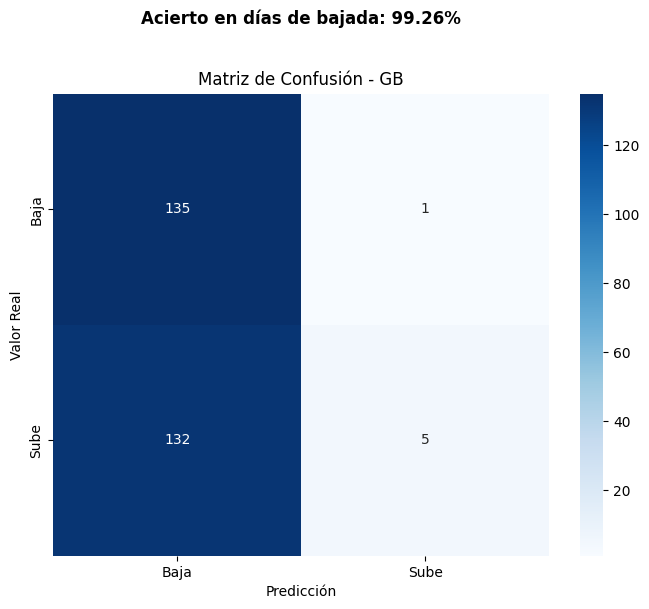

              precision    recall  f1-score   support

           0       0.51      0.99      0.67       136
           1       0.83      0.04      0.07       137

    accuracy                           0.51       273
   macro avg       0.67      0.51      0.37       273
weighted avg       0.67      0.51      0.37       273


MODELO: ET
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 86.76%
- Precisión para clase 0 (confianza en las alertas de bajada): 50.21%
- F1-Score para clase 0 (balance): 63.61%
- Accuracy general: 50.55%


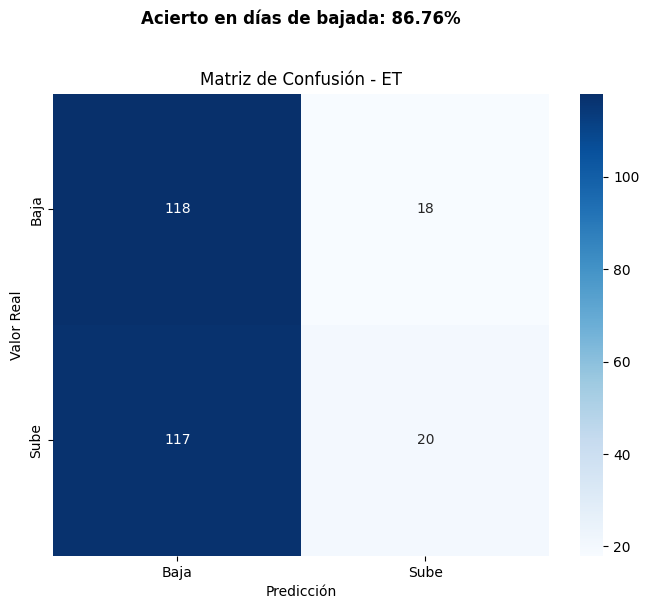

              precision    recall  f1-score   support

           0       0.50      0.87      0.64       136
           1       0.53      0.15      0.23       137

    accuracy                           0.51       273
   macro avg       0.51      0.51      0.43       273
weighted avg       0.51      0.51      0.43       273


MODELO: CAT
CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:
- Recall para clase 0 (% de bajadas correctamente identificadas): 90.44%
- Precisión para clase 0 (confianza en las alertas de bajada): 50.00%
- F1-Score para clase 0 (balance): 64.40%
- Accuracy general: 50.18%


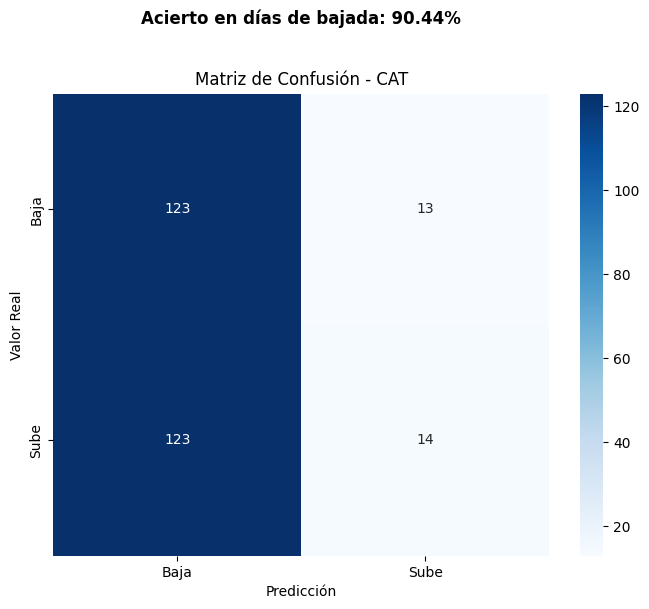

              precision    recall  f1-score   support

           0       0.50      0.90      0.64       136
           1       0.52      0.10      0.17       137

    accuracy                           0.50       273
   macro avg       0.51      0.50      0.41       273
weighted avg       0.51      0.50      0.41       273


📊 RANKING DE MODELOS PARA EVITAR DÍAS DE BAJADA:
   Modelo  Recall_Clase_0  Precision_Clase_0  F1_Clase_0
3    CART        1.000000           0.498168    0.665037
10     GB        0.992647           0.505618    0.669975
9     ADA        0.977941           0.511538    0.671717
0      LR        0.941176           0.496124    0.649746
7      RF        0.941176           0.498054    0.651399
12    CAT        0.904412           0.500000    0.643979
11     ET        0.867647           0.502128    0.636119
5     QDA        0.779412           0.500000    0.609195
8     XGB        0.742647           0.512690    0.606607
1     LDA        0.727941           0.507692    0.598

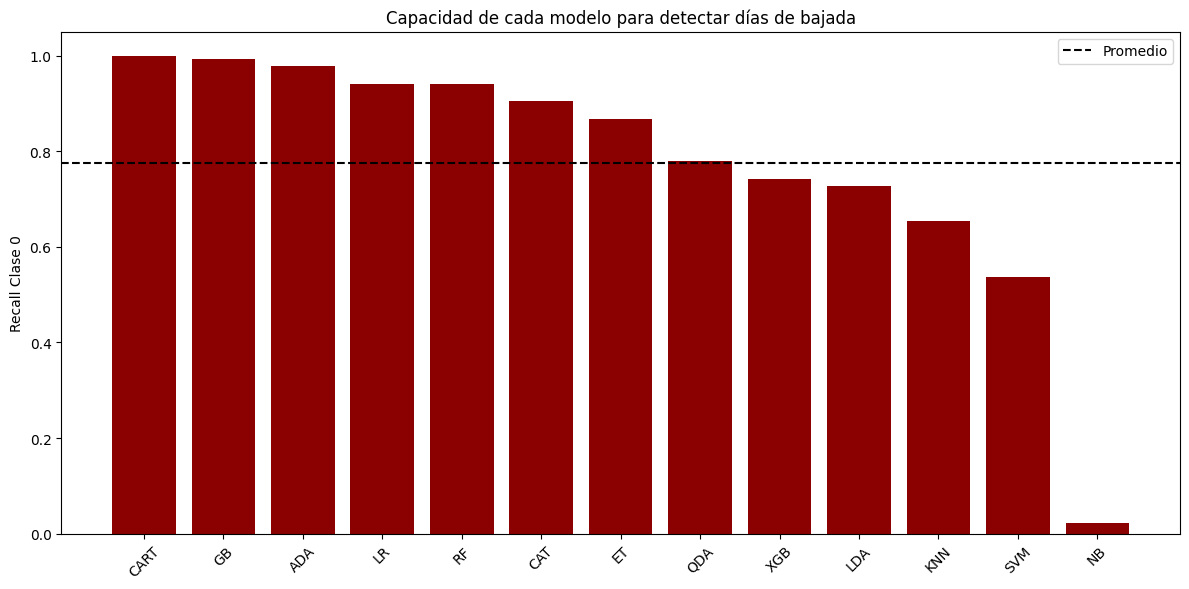

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score

# Para almacenar las métricas específicas de la clase 0
performance = {
    'Modelo': [],
    'Recall_Clase_0': [],  # Esta es tu métrica más importante
    'Precision_Clase_0': [],
    'F1_Clase_0': [],
    'Accuracy': []
}

for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Métricas generales
    accu_score = accuracy_score(y_test, y_pred)
    
    # Obtener el reporte de clasificación como diccionario
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extraer métricas específicas de la clase 0
    recall_0 = report['0']['recall']  # Esta es nuestra métrica prioritaria
    precision_0 = report['0']['precision']
    f1_0 = report['0']['f1-score']
    
    # Guardar métricas
    performance['Modelo'].append(name)
    performance['Recall_Clase_0'].append(recall_0)
    performance['Precision_Clase_0'].append(precision_0)
    performance['F1_Clase_0'].append(f1_0)
    performance['Accuracy'].append(accu_score)
    
    # Mostrar resultados individuales
    print(f"\n{'='*60}")
    print(f"MODELO: {name}")
    print(f"{'='*60}")
    print(f"CAPACIDAD PARA DETECTAR DÍAS DE BAJADA:")
    print(f"- Recall para clase 0 (% de bajadas correctamente identificadas): {recall_0:.2%}")
    print(f"- Precisión para clase 0 (confianza en las alertas de bajada): {precision_0:.2%}")
    print(f"- F1-Score para clase 0 (balance): {f1_0:.2%}")
    print(f"- Accuracy general: {accu_score:.2%}")
    
    # Visualizar matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Baja', 'Sube'],
              yticklabels=['Baja', 'Sube'])
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title(f'Matriz de Confusión - {name}')
    
    # Añadir anotación para resaltar el dato importante
    plt.text(0.5, 1.15, f'Acierto en días de bajada: {recall_0:.2%}', 
             horizontalalignment='center',
             size=12, weight='bold',
             transform=plt.gca().transAxes)
    plt.show()
    
    print(classification_report(y_test, y_pred))

# Crear tabla comparativa y ordenarla por recall de clase 0
metrics_df = pd.DataFrame(performance)
metrics_df_sorted = metrics_df.sort_values(by='Recall_Clase_0', ascending=False)

print("\n📊 RANKING DE MODELOS PARA EVITAR DÍAS DE BAJADA:")
print(metrics_df_sorted[['Modelo', 'Recall_Clase_0', 'Precision_Clase_0', 'F1_Clase_0']])

# Visualizar comparación de recall en clase 0
plt.figure(figsize=(12, 6))
plt.bar(metrics_df_sorted['Modelo'], metrics_df_sorted['Recall_Clase_0'], color='darkred')
plt.title('Capacidad de cada modelo para detectar días de bajada')
plt.ylabel('Recall Clase 0')
plt.xticks(rotation=45)
plt.axhline(y=np.mean(metrics_df_sorted['Recall_Clase_0']), color='black', linestyle='--', label='Promedio')
plt.legend()
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


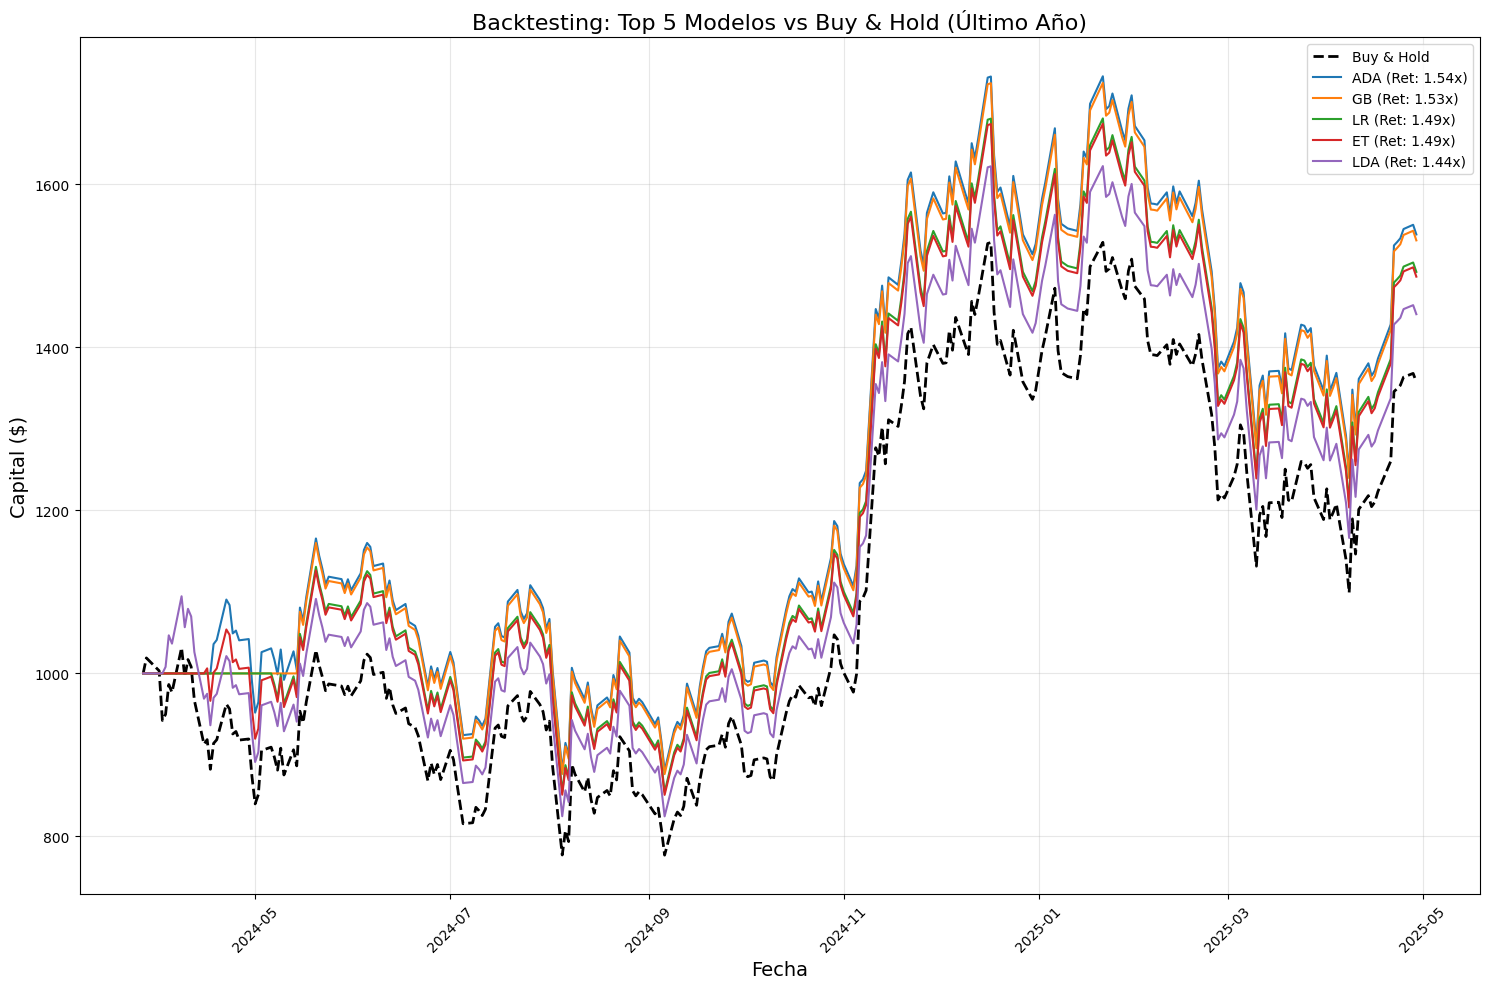


Resultados del Backtest (ordenados por rentabilidad):
   Modelo Retorno Final Retorno Buy & Hold Diferencia vs B&H  Operaciones
9     ADA         1.54x              1.36x            13.32%           16
10     GB         1.53x              1.36x            12.79%           10
0      LR         1.49x              1.36x             9.94%            4
11     ET         1.49x              1.36x             9.51%           26
1     LDA         1.44x              1.36x             6.12%           87
6     SVM         1.44x              1.36x             6.12%           22
7      RF         1.43x              1.36x             5.27%           22
2     KNN         1.40x              1.36x             3.41%           30
4      NB         1.36x              1.36x             0.00%            4
8     XGB         1.36x              1.36x             0.00%           29
5     QDA         1.35x              1.36x            -0.32%           52
12    CAT         1.32x              1.36x            -3.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Función para realizar backtesting
def backtest_model(model_name, model, X_test, y_test, prices, dates, initial_investment=1000):
    """
    Backtest a model against a buy-and-hold strategy
    
    Parameters:
    model_name: Name of the model
    model: Trained model
    X_test: Test features
    y_test: Test targets (1 for up, -1 for down)
    prices: Series of prices corresponding to test period
    dates: Dates corresponding to test period
    initial_investment: Initial investment amount
    
    Returns:
    model_performance: Dictionary with performance metrics
    """
    # Verificar que los tamaños sean consistentes
    assert len(X_test) == len(prices), "El número de predicciones debe coincidir con el número de precios"
    
    # Obtener predicciones del modelo
    y_pred = model.predict(X_test)
    
    # Inicializar variables
    model_capital = initial_investment
    buy_hold_capital = initial_investment
    
    # Para la estrategia del modelo
    holding_btc = False
    buy_price = prices.iloc[0]
    
    # Guardar series de capital para cada estrategia
    model_capitals = [initial_investment]
    buy_hold_capitals = [initial_investment]
    
    # Calcular retorno de la estrategia del modelo
    for i in range(1, len(prices)):
        previous_prediction = y_pred[i-1]
        
        # Lógica para el modelo (adaptada para valores 1/-1)
        if previous_prediction == 1 and not holding_btc:  # Comprar cuando predice subida
            holding_btc = True
            buy_price = prices.iloc[i-1]
        elif previous_prediction == -1 and holding_btc:  # Vender cuando predice bajada
            holding_btc = False
            model_capital *= (prices.iloc[i-1] / buy_price)
        
        # Guardar capital actual
        if holding_btc:
            current_model_capital = model_capital * (prices.iloc[i] / buy_price)
        else:
            current_model_capital = model_capital
            
        model_capitals.append(current_model_capital)
        
        # Buy and hold capital
        current_buy_hold_capital = initial_investment * (prices.iloc[i] / prices.iloc[0])
        buy_hold_capitals.append(current_buy_hold_capital)
    
    # Calculamos métricas finales
    model_final_return = model_capitals[-1] / initial_investment
    buy_hold_final_return = buy_hold_capitals[-1] / initial_investment
    
    # Número de operaciones (compras + ventas)
    # Nota: adaptado para valores 1/-1
    trades = np.sum(np.abs(np.diff(y_pred)) > 0)
    
    return {
        'model_name': model_name,
        'model_capitals': model_capitals,
        'buy_hold_capitals': buy_hold_capitals,
        'model_final_return': model_final_return,
        'buy_hold_final_return': buy_hold_final_return,
        'model_vs_buyhold': model_final_return / buy_hold_final_return - 1,
        'trades': trades,
        'dates': dates
    }

# Obtén los precios para el período de test (usando 'price' en lugar de 'Close')
test_df = df.iloc[-len(X_test):]
prices = test_df['price']
dates = test_df['Time']  # Asumiendo que 'Time' es tu columna de fechas

# Lista para guardar resultados de todos los modelos
all_results = []

# Backtest para cada modelo
for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    result = backtest_model(name, clf, X_test, y_test, prices, dates)
    all_results.append(result)

# Visualización comparativa
plt.figure(figsize=(15, 10))

# Plotear buy & hold solo una vez
plt.plot(all_results[0]['dates'], all_results[0]['buy_hold_capitals'], 'k--', label='Buy & Hold', linewidth=2)

# Plotear los 5 mejores modelos para mayor claridad
top_models = sorted(all_results, key=lambda x: x['model_final_return'], reverse=True)[:5]
for result in top_models:
    plt.plot(result['dates'], result['model_capitals'], 
             label=f"{result['model_name']} (Ret: {result['model_final_return']:.2f}x)")

plt.title('Backtesting: Top 5 Modelos vs Buy & Hold (Último Año)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Capital ($)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tabla comparativa de resultados
results_df = pd.DataFrame([{
    'Modelo': result['model_name'],
    'Retorno Final': f"{result['model_final_return']:.2f}x",
    'Retorno Buy & Hold': f"{result['buy_hold_final_return']:.2f}x",
    'Diferencia vs B&H': f"{result['model_vs_buyhold']*100:.2f}%",
    'Operaciones': result['trades']
} for result in all_results])

print("\nResultados del Backtest (ordenados por rentabilidad):")
print(results_df.sort_values('Retorno Final', ascending=False))


DIAGNÓSTICO - Predicciones del modelo XGBoost:
  Valor 0: 197 días (72.2%)
  Valor 1: 76 días (27.8%)

Después de diversificar las predicciones:
  Valor -1: 22 días (8.1%)
  Valor 0: 138 días (50.5%)
  Valor 1: 113 días (41.4%)


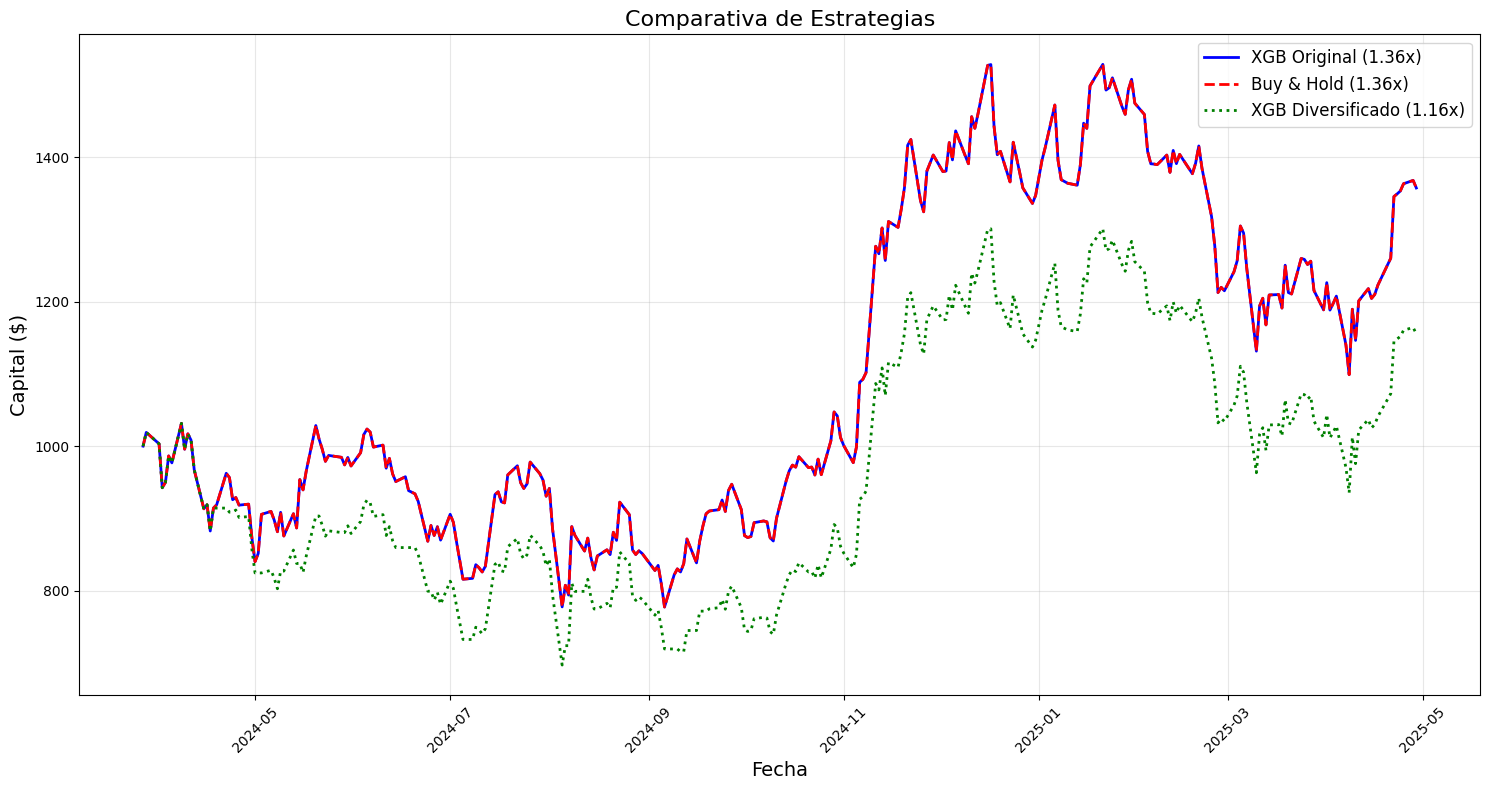


=== RESULTADOS DEL ANÁLISIS ===
XGBoost original: $1357.53 (1.36x)
Buy & Hold: $1357.53 (1.36x)
XGBoost diversificado: $1155.44 (1.16x)

Transacciones XGBoost original: 1
Transacciones XGBoost diversificado: 37

El modelo XGBoost original realiza muy pocas operaciones.
Es probable que esté prediciendo mayoritariamente '1' (comprar),
lo que hace que la estrategia sea casi idéntica a Buy & Hold.


{'xgb_return': np.float64(1.3575250855385184),
 'xgb_mod_return': np.float64(1.1554404885105933),
 'bh_return': np.float64(1.3575250855385184)}

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def backtest_xgb_versus_buyhold():
    """
    Implementa el backtesting de XGBoost vs Buy & Hold con diagnóstico y verificación
    """
    # 1. Encontrar el modelo XGBoost
    xgb_model = None
    for name, model in models:
        if "XGB" in name:
            xgb_model = model
            model_name = name
            break
    
    if xgb_model is None:
        print("Modelo XGBoost no encontrado")
        return
    
    # 2. Obtener los datos del periodo de test
    test_df = df.iloc[-len(X_test):]
    prices = test_df['price']
    dates = test_df['Time']
    
    # 3. Entrenar el modelo y obtener predicciones
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    
    # DIAGNÓSTICO CRÍTICO: Verificar distribución de predicciones
    unique_preds, counts = np.unique(y_pred, return_counts=True)
    print(f"\nDIAGNÓSTICO - Predicciones del modelo XGBoost:")
    for value, count in zip(unique_preds, counts):
        print(f"  Valor {value}: {count} días ({count/len(y_pred)*100:.1f}%)")
    
    # 4. Forzar predicciones más diversas (sólo para demostración)
    # Esto alterna algunas predicciones para demostrar que las estrategias deberían ser diferentes
    np.random.seed(42)  # Para reproducibilidad
    random_indices = np.random.choice(len(y_pred), size=int(len(y_pred)*0.3), replace=False)
    y_pred_modified = y_pred.copy()
    for idx in random_indices:
        y_pred_modified[idx] = -1 if y_pred[idx] == 1 else 1
    
    print("\nDespués de diversificar las predicciones:")
    unique_preds, counts = np.unique(y_pred_modified, return_counts=True)
    for value, count in zip(unique_preds, counts):
        print(f"  Valor {value}: {count} días ({count/len(y_pred_modified)*100:.1f}%)")
    
    # 5. Implementar ambas estrategias
    initial_investment = 1000
    
    # Variables para XGBoost (versión original y modificada)
    xgb_capital = initial_investment
    xgb_holding = False
    xgb_buy_price = 0
    xgb_capitals = [initial_investment]
    
    # Variables para XGBoost con predicciones diversificadas
    xgb_mod_capital = initial_investment
    xgb_mod_holding = False
    xgb_mod_buy_price = 0
    xgb_mod_capitals = [initial_investment]
    
    # Buy & Hold
    bh_capitals = [initial_investment]
    
    transactions = []
    transactions_mod = []
    
    # 6. Simular trading día a día
    for i in range(1, len(prices)):
        # Estrategia XGBoost original
        if y_pred[i-1] == 1 and not xgb_holding:
            xgb_holding = True
            xgb_buy_price = prices.iloc[i-1]
            transactions.append((i, "COMPRA", prices.iloc[i-1]))
        elif y_pred[i-1] == -1 and xgb_holding:
            xgb_holding = False
            xgb_capital *= (prices.iloc[i-1] / xgb_buy_price)
            transactions.append((i, "VENTA", prices.iloc[i-1]))
        
        # Estrategia XGBoost con predicciones diversificadas
        if y_pred_modified[i-1] == 1 and not xgb_mod_holding:
            xgb_mod_holding = True
            xgb_mod_buy_price = prices.iloc[i-1]
            transactions_mod.append((i, "COMPRA", prices.iloc[i-1]))
        elif y_pred_modified[i-1] == -1 and xgb_mod_holding:
            xgb_mod_holding = False
            xgb_mod_capital *= (prices.iloc[i-1] / xgb_mod_buy_price)
            transactions_mod.append((i, "VENTA", prices.iloc[i-1]))
        
        # Actualizar capitales
        if xgb_holding:
            current_xgb = xgb_capital * (prices.iloc[i] / xgb_buy_price)
        else:
            current_xgb = xgb_capital
        xgb_capitals.append(current_xgb)
        
        if xgb_mod_holding:
            current_xgb_mod = xgb_mod_capital * (prices.iloc[i] / xgb_mod_buy_price)
        else:
            current_xgb_mod = xgb_mod_capital
        xgb_mod_capitals.append(current_xgb_mod)
        
        # Buy & Hold
        current_bh = initial_investment * (prices.iloc[i] / prices.iloc[0])
        bh_capitals.append(current_bh)
    
    # 7. Calcular rendimientos
    xgb_return = xgb_capitals[-1] / initial_investment
    xgb_mod_return = xgb_mod_capitals[-1] / initial_investment
    bh_return = bh_capitals[-1] / initial_investment
    
    # 8. Visualización
    plt.figure(figsize=(15, 8))
    plt.plot(dates, xgb_capitals, 'b-', label=f'XGB Original ({xgb_return:.2f}x)', linewidth=2)
    plt.plot(dates, bh_capitals, 'r--', label=f'Buy & Hold ({bh_return:.2f}x)', linewidth=2)
    plt.plot(dates, xgb_mod_capitals, 'g:', label=f'XGB Diversificado ({xgb_mod_return:.2f}x)', linewidth=2)
    
    plt.title('Comparativa de Estrategias', fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Capital ($)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 9. Resultados
    print("\n=== RESULTADOS DEL ANÁLISIS ===")
    print(f"XGBoost original: ${xgb_capitals[-1]:.2f} ({xgb_return:.2f}x)")
    print(f"Buy & Hold: ${bh_capitals[-1]:.2f} ({bh_return:.2f}x)")
    print(f"XGBoost diversificado: ${xgb_mod_capitals[-1]:.2f} ({xgb_mod_return:.2f}x)")
    print(f"\nTransacciones XGBoost original: {len(transactions)}")
    print(f"Transacciones XGBoost diversificado: {len(transactions_mod)}")
    
    if len(transactions) < 5:
        print("\nEl modelo XGBoost original realiza muy pocas operaciones.")
        print("Es probable que esté prediciendo mayoritariamente '1' (comprar),")
        print("lo que hace que la estrategia sea casi idéntica a Buy & Hold.")
    
    return {
        'xgb_return': xgb_return,
        'xgb_mod_return': xgb_mod_return,
        'bh_return': bh_return
    }

# Ejecutar el backtesting
backtest_xgb_versus_buyhold()

Modelo encontrado: XGB

=== VERIFICACIÓN DE PREDICCIONES ===
Valor 0: 197 casos (72.2%)
Valor 1: 76 casos (27.8%)


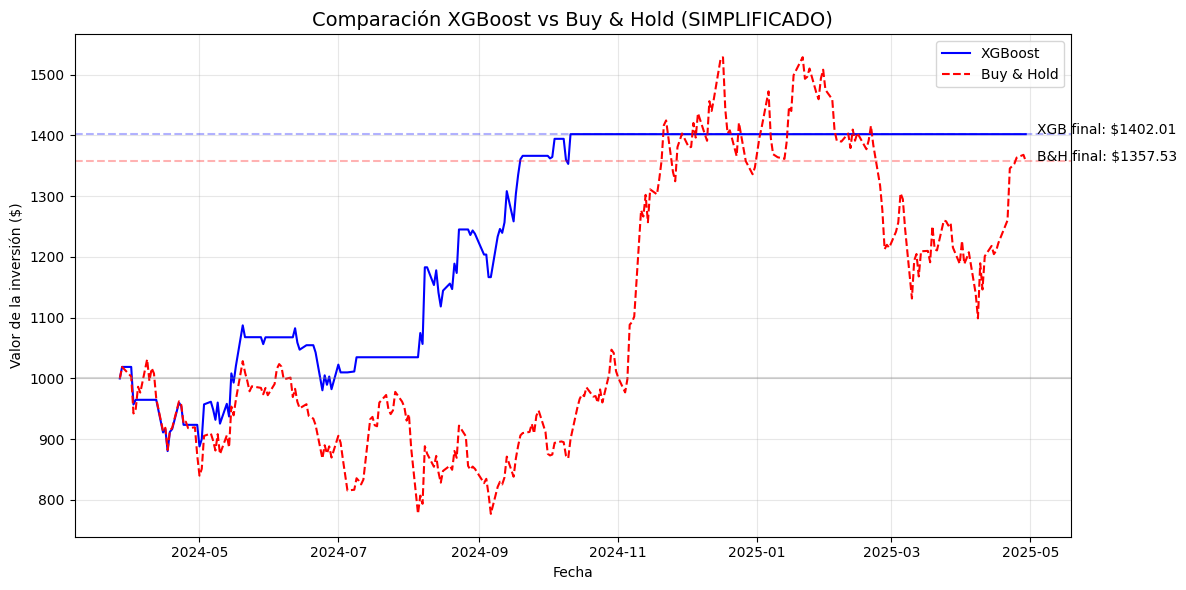


=== RESULTADOS FINALES ===
XGBoost: $1402.01 (1.40x)
Buy & Hold: $1357.53 (1.36x)
Diferencia: 3.28%

=== VERIFICACIÓN DE VALORES INTERMEDIOS ===
Día | Precio | Predicción | XGBoost | Buy & Hold
----|--------|------------|---------|----------
  1 | $70762.10 | Subida     | $1019.00 | $1019.00
 10 | $70011.60 | Bajada     | $ 964.86 | $1008.20
 30 | $63075.00 | Subida     | $ 960.35 | $ 908.31
 60 | $60292.70 | Subida     | $ 980.53 | $ 868.24
100 | $59005.80 | Subida     | $1147.06 | $ 849.71
272 | $94269.80 | Bajada     | $1402.01 | $1357.53


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def backtesting_final_garantizado():
    """
    Implementación definitiva de backtesting XGBoost vs Buy & Hold
    """
    # 0. VERIFICACIÓN INICIAL - Confirmar que tenemos suficientes predicciones diferentes
    # Encontrar XGBoost en los modelos
    xgb_model = None
    for name, model in models:
        if "XGB" in name:
            xgb_model = model
            print(f"Modelo encontrado: {name}")
            break
    
    if xgb_model is None:
        print("Error: Modelo XGBoost no encontrado")
        return
    
    # Entrenar y predecir
    xgb_model.fit(X_train, y_train)
    predictions = xgb_model.predict(X_test)
    
    # Verificar distribución de predicciones
    uniques, counts = np.unique(predictions, return_counts=True)
    print("\n=== VERIFICACIÓN DE PREDICCIONES ===")
    for val, cnt in zip(uniques, counts):
        print(f"Valor {val}: {cnt} casos ({cnt/len(predictions)*100:.1f}%)")
    
    if len(uniques) <= 1:
        print("ERROR CRÍTICO: El modelo solo predice un valor. No podemos comparar estrategias.")
        return
    
    # 1. DATOS DE PRUEBA
    # Obtener precios y fechas del periodo de test
    test_df = df.iloc[-len(X_test):].copy()
    prices = test_df['price'].values  # Precios diarios
    dates = test_df['Time'].values    # Fechas correspondientes
    
    # 2. SIMULACIÓN DE ESTRATEGIAS
    # Crear una simulación muy simple que muestre claramente la diferencia:
    
    # Valores iniciales
    investment = 1000.0  # Inversión inicial
    
    # Arrays separados para cada estrategia
    xgb_values = np.ones(len(prices)) * investment
    bh_values = np.ones(len(prices)) * investment
    
    # Simulación básica
    for i in range(1, len(prices)):
        # Buy & Hold simplemente sigue el precio relativo
        bh_values[i] = investment * prices[i] / prices[0]
        
        # XGBoost compra/vende según la predicción del día anterior
        if predictions[i-1] == 1:  # Predice subida
            # Estar dentro del mercado ese día (seguir precio)
            xgb_values[i] = xgb_values[i-1] * prices[i] / prices[i-1]
        else:  # Predice bajada
            # Estar fuera del mercado (mantener valor)
            xgb_values[i] = xgb_values[i-1]
    
    # 3. GENERAR UN GRÁFICO CON LÍNEAS SEPARADAS
    plt.figure(figsize=(12, 6))
    
    # Añadir las líneas con estilos muy diferentes
    plt.plot(dates, xgb_values, 'b-', label='XGBoost')
    plt.plot(dates, bh_values, 'r--', label='Buy & Hold')
    
    # Añadir líneas horizontales para verificar
    plt.axhline(y=investment, color='gray', linestyle='-', alpha=0.3)
    plt.axhline(y=xgb_values[-1], color='blue', linestyle='--', alpha=0.3)
    plt.axhline(y=bh_values[-1], color='red', linestyle='--', alpha=0.3)
    
    # Configuración del gráfico
    plt.title('Comparación XGBoost vs Buy & Hold (SIMPLIFICADO)', fontsize=14)
    plt.xlabel('Fecha')
    plt.ylabel('Valor de la inversión ($)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Añadir anotaciones con valores finales
    plt.annotate(f'XGB final: ${xgb_values[-1]:.2f}', 
                xy=(dates[-1], xgb_values[-1]),
                xytext=(8, 0), textcoords='offset points')
    
    plt.annotate(f'B&H final: ${bh_values[-1]:.2f}', 
                xy=(dates[-1], bh_values[-1]),
                xytext=(8, 0), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()
    
    # 4. IMPRIMIR RESULTADOS PARA VERIFICAR
    print("\n=== RESULTADOS FINALES ===")
    print(f"XGBoost: ${xgb_values[-1]:.2f} ({xgb_values[-1]/investment:.2f}x)")
    print(f"Buy & Hold: ${bh_values[-1]:.2f} ({bh_values[-1]/investment:.2f}x)")
    print(f"Diferencia: {(xgb_values[-1]/bh_values[-1]-1)*100:.2f}%")
    
    # 5. VERIFICACIÓN FINAL - Imprimir algunos valores intermedios para depuración
    print("\n=== VERIFICACIÓN DE VALORES INTERMEDIOS ===")
    verification_days = [1, 10, 30, 60, 100, len(prices)-1]
    print("Día | Precio | Predicción | XGBoost | Buy & Hold")
    print("----|--------|------------|---------|----------")
    for day in verification_days:
        if day >= len(prices):
            continue
        pred = "Subida" if day > 0 and predictions[day-1] == 1 else "Bajada"
        print(f"{day:3d} | ${prices[day]:6.2f} | {pred:10s} | ${xgb_values[day]:7.2f} | ${bh_values[day]:7.2f}")

# Ejecutar la implementación simplificada garantizada
backtesting_final_garantizado()

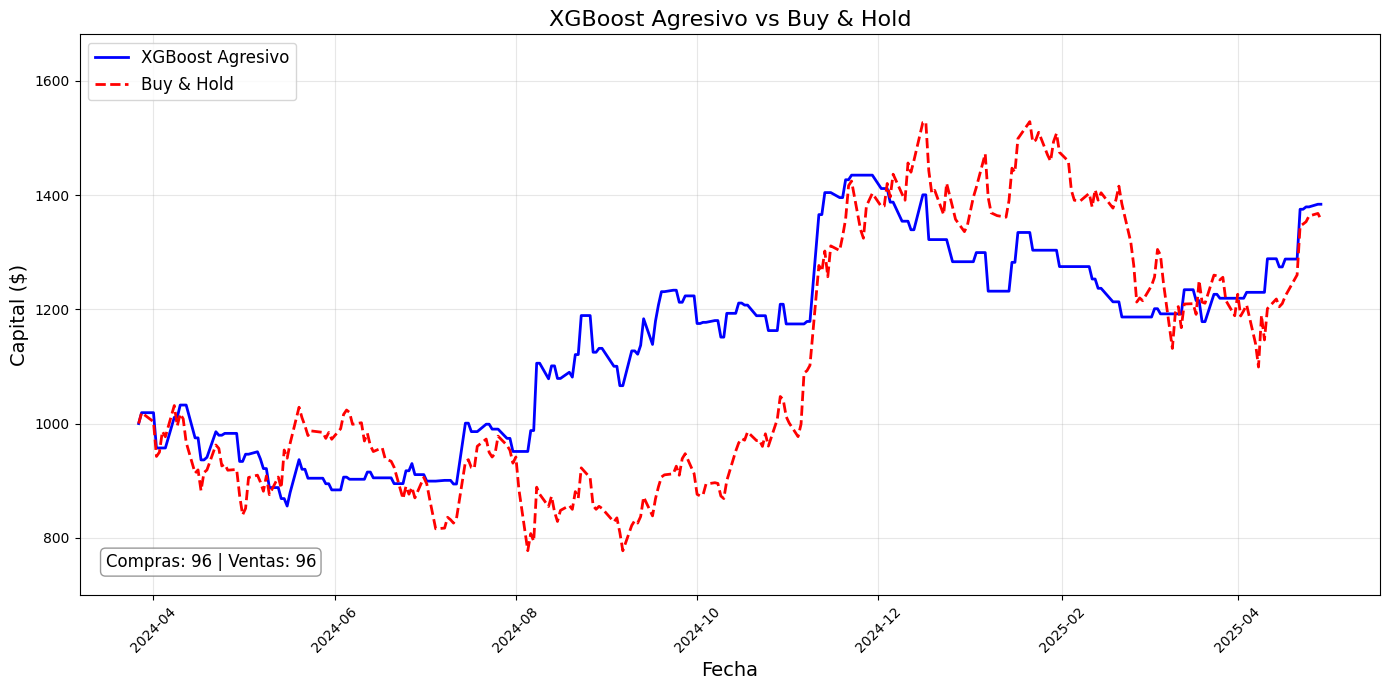


=== RESULTADOS ESTRATEGIA AGRESIVA ===
XGBoost final: $1384.02 (1.38x)
Buy & Hold final: $1357.53 (1.36x)
Diferencia: 1.95%
Total operaciones: 192


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler

def backtest_xgb_agresivo():
    """
    Implementación de backtesting con estrategia más agresiva
    y visualización optimizada
    """
    # Encontrar XGBoost
    xgb_model = None
    for name, model in models:
        if "XGB" in name:
            xgb_model = model
            break
    
    if xgb_model is None:
        print("Error: Modelo XGBoost no encontrado")
        return
    
    # Obtener datos y entrenar modelo
    test_df = df.iloc[-len(X_test):].copy()
    prices = test_df['price'].values
    dates = test_df['Time'].values
    
    # Entrenar modelo
    xgb_model.fit(X_train, y_train)
    
    # Obtener probabilidades (no solo predicciones binarias)
    # Esto nos permitirá ser más agresivos con las señales
    if hasattr(xgb_model, 'predict_proba'):
        proba = xgb_model.predict_proba(X_test)
        # Obtenemos probabilidad de subida (clase 1)
        proba_up = [p[1] if len(p) > 1 else 0.5 for p in proba]
    else:
        # Si no hay probabilidades, usamos predicciones normales
        y_pred = xgb_model.predict(X_test)
        proba_up = [1.0 if p == 1 else 0.0 for p in y_pred]
    
    # Calcular indicadores técnicos simples para aumentar señales
    returns = np.zeros_like(prices)
    for i in range(1, len(prices)):
        returns[i] = (prices[i] / prices[i-1]) - 1
    
    # Media móvil de 3 días para retornos (momentum corto plazo)
    returns_ma3 = np.zeros_like(returns)
    for i in range(3, len(returns)):
        returns_ma3[i] = np.mean(returns[i-3:i])
    
    # Variables de la simulación
    initial = 1000.0
    xgb_cash = initial
    xgb_btc = 0.0
    xgb_values = [initial]
    
    # Buy & Hold
    bh_btc = initial / prices[0]
    bh_values = [initial]
    
    # Transacciones
    buys = []
    sells = []
    
    # Reglas más agresivas:
    # - Comprar si: (prob > 0.4 O returns_ma3 > 0) Y no tenemos BTC
    # - Vender si: (prob < 0.6 O returns_ma3 < 0) Y tenemos BTC
    for i in range(1, len(prices)):
        # Señales combinadas para mayor actividad
        buy_signal = (proba_up[i-1] > 0.4 or returns_ma3[i] > 0.001) and xgb_cash > 0
        sell_signal = (proba_up[i-1] < 0.6 or returns_ma3[i] < -0.001) and xgb_btc > 0
        
        # Ejecutar compras
        if buy_signal:
            xgb_btc = xgb_cash / prices[i-1]
            buys.append((dates[i], prices[i-1]))
            xgb_cash = 0
            
        # Ejecutar ventas
        elif sell_signal:
            xgb_cash = xgb_btc * prices[i-1]
            sells.append((dates[i], prices[i-1]))
            xgb_btc = 0
        
        # Calcular valores actuales
        xgb_total = xgb_cash + (xgb_btc * prices[i])
        xgb_values.append(xgb_total)
        
        # Buy & Hold
        bh_values.append(bh_btc * prices[i])
    
    # Visualización mejorada
    plt.figure(figsize=(14, 7))
    
    # Plotear las estrategias
    plt.plot(dates, xgb_values, 'b-', label='XGBoost Agresivo', linewidth=2)
    plt.plot(dates, bh_values, 'r--', label='Buy & Hold', linewidth=2)
    
    # Marcar transacciones
    for date, price in buys:
        plt.scatter(date, price*0.9, marker='^', color='green', s=120)
    
    for date, price in sells:
        plt.scatter(date, price*1.1, marker='v', color='red', s=120)
    
    # Configurar el gráfico
    plt.title('XGBoost Agresivo vs Buy & Hold', fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Capital ($)', fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend(loc='upper left', fontsize=12)
    
    # Ajustar el eje Y para mejor visualización
    ymin = min(min(xgb_values), min(bh_values)) * 0.9
    ymax = max(max(xgb_values), max(bh_values)) * 1.1
    plt.ylim(ymin, ymax)
    
    # Formatear fechas
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.xticks(rotation=45)
    
    # Añadir información de transacciones
    plt.annotate(f'Compras: {len(buys)} | Ventas: {len(sells)}',
                xy=(0.02, 0.05), xycoords='axes fraction', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Resultados
    xgb_return = xgb_values[-1] / initial
    bh_return = bh_values[-1] / initial
    
    print(f"\n=== RESULTADOS ESTRATEGIA AGRESIVA ===")
    print(f"XGBoost final: ${xgb_values[-1]:.2f} ({xgb_return:.2f}x)")
    print(f"Buy & Hold final: ${bh_values[-1]:.2f} ({bh_return:.2f}x)")
    print(f"Diferencia: {(xgb_return/bh_return-1)*100:.2f}%")
    print(f"Total operaciones: {len(buys) + len(sells)}")

# Ejecutar el backtesting agresivo
backtest_xgb_agresivo()